In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Segmentation d'images par classification supervisée

je vais développer deux modèles de classification
supervisée pour la segmentation des images.

Comme entrée des deux modèles, nous aurons une image ainsi que son masque de segmentation.

1. Le premier modèle utilisera les intensités de couleur en R, G, B, H, S, et V pour créer un vecteur de caractéristiques pour chaque pixel.

2. Le deuxième modèle se concentrera sur la segmentation en niveaux de gris, où je vais créer un vecteur de caractéristiques basé sur les intensités en niveaux de gris.

## 1.  Premier modèle

### 1.1 Extraction des caracteristiques

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Charger l'image originale
image_path="/content/drive/MyDrive/tp3/Image_clustering/1.bmp"
image=cv.imread(image_path)
# Descripteur : Intensités dans l'espace RGB
imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # BGR vers RGB
imgRGB_reshape = imageRGB.reshape(-1, 3)  # Aplatir l'image en une liste de pixels

# Descripteur : Intensités dans l'espace HSV
imageHSV = cv.cvtColor(image, cv.COLOR_BGR2HSV)  # BGR vers HSV
imgHSV_reshape = imageHSV.reshape(-1, 3)  # Aplatir l'image en une liste de pixels

# Descripteur dans les espaces RGB et HSV
X = np.concatenate([imgRGB_reshape, imgHSV_reshape], axis=1)  # Concaténer les caractéristiques
print("Shape of features X:", X.shape)

Shape of features X: (113232, 6)


### 1.2 Création des étiquettes

 Je vais utiliser le masque de segmentation fourni pour créer les étiquettes pour chaque pixel.

In [ ]:
# Création de l’étiquette
mask_path = "/content/drive/MyDrive/tp3/Image_clustering/1_GT.bmp"
imageMask = cv.imread(mask_path, cv.IMREAD_GRAYSCALE)
h, w = imageMask.shape  # Obtenir la hauteur et la largeur du masque
imageMask = imageMask.ravel() // 255  # Convertir le masque en 1D binaire
imageMask = imageMask.reshape(-1, 1)  # Reshape pour correspondre à la forme attendue

# Construction des étiquettes y
y = np.concatenate(imageMask)  # Convertir les étiquettes en un tableau
print(np.array(imageMask).shape)

(113232, 1)


### 1.3 Entrainement et évaluation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)
print(clf.score)
rapport=classification_report(y_test, y_pred)
# Afficher le rapport sous forme de tableau
print('Rapport de Classification : \n',rapport)
import sklearn.metrics as metrics
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro'))
print("recall : ", metrics.recall_score(y_test, y_pred, average='macro'))
print("f1 score: ", metrics.f1_score(y_test, y_pred, average='macro'))


<bound method ClassifierMixin.score of SVC()>
Rapport de Classification : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     15345
           1       0.99      0.99      0.99     22022

    accuracy                           0.99     37367
   macro avg       0.99      0.99      0.99     37367
weighted avg       0.99      0.99      0.99     37367

accuracy:  0.9904461155565071
precision:  0.9895881848574746
recall :  0.9907188282554852
f1 score:  0.9901424934169001


### 1.4 Serialisation de modèle

In [ ]:
import joblib

# Chemin vers le dossier tp3 sur Google Drive
chemin_modele = '/content/drive/MyDrive/tp3/modele_svm_RGB_HSV.pkl'

# Sérialiser le modèle SVM et l'enregistrer dans le dossier tp3
joblib.dump(clf, chemin_modele)

['/content/drive/MyDrive/tp3/modele_svm_RGB_HSV.pkl']

### 1.5 Segmenter l'image 2

In [ ]:
# Charger l'image originale
image_path="/content/drive/MyDrive/tp3/Image_clustering/2.bmp"
image=cv.imread(image_path)
# Descripteur : Intensités dans l'espace RGB
imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # BGR vers RGB
imgRGB_reshape = imageRGB.reshape(-1, 3)  # Aplatir l'image en une liste de pixels

# Descripteur : Intensités dans l'espace HSV
imageHSV = cv.cvtColor(image, cv.COLOR_BGR2HSV)  # BGR vers HSV
imgHSV_reshape = imageHSV.reshape(-1, 3)  # Aplatir l'image en une liste de pixels

# Descripteur dans les espaces RGB et HSV
Xnew = np.concatenate([imgRGB_reshape, imgHSV_reshape], axis=1)  # Concaténer les caractéristiques
print("Shape of features X:", Xnew.shape)

Shape of features X: (113232, 6)


Segmenter l'image revient à prédire les étiquettes de chaque pixel de l'image.

In [ ]:
Ynew=clf.predict(Xnew)

Construire l'image segmentée (mask) utilisant le vecteur prédit

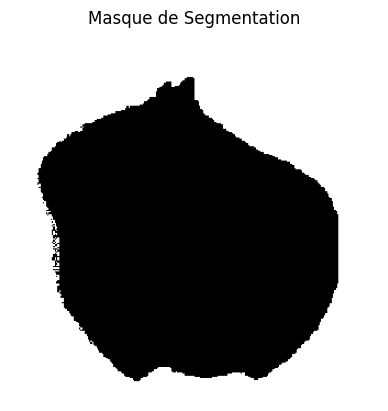

In [ ]:
# Reconstruire le masque de segmentation en fonction de la forme d'origine de l'image
mask_new = Ynew.reshape(image.shape[:2])
# Afficher le masque de segmentation
plt.imshow(mask_new, cmap='gray')
plt.title("Masque de Segmentation")
plt.axis('off')
plt.show()

### 1.6 Evaluer le modéle

In [ ]:
mask_path_2GT="/content/drive/MyDrive/tp3/Image_clustering/2_GT.bmp"
imageMask_2GT=cv.imread(mask_path_2GT, cv.IMREAD_GRAYSCALE).ravel()//255
imageMask_2GT = imageMask_2GT.reshape(-1,1)
y_2GT =np.concatenate(imageMask_2GT)

confusion_matrix(y_2GT, Ynew)
rapport=classification_report(y_2GT, Ynew)
# Afficher le rapport sous forme de tableau
print('Rapport de Classification : \n',rapport)
import sklearn.metrics as metrics
print("accuracy: ", metrics.accuracy_score(y_2GT, Ynew))
print("precision: ", metrics.precision_score(y_2GT, Ynew, average='macro'))
print("recall : ", metrics.recall_score(y_2GT, Ynew, average='macro'))
print("f1 score: ", metrics.f1_score(y_2GT, Ynew, average='macro'))

Rapport de Classification : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     52426
           1       1.00      0.97      0.99     60806

    accuracy                           0.98    113232
   macro avg       0.98      0.99      0.98    113232
weighted avg       0.98      0.98      0.98    113232

accuracy:  0.9843153878762188
precision:  0.9836850901309582
recall :  0.9850886131436278
f1 score:  0.9842539668158425


Le modèle a une excellente performance de segmentation, avec une haute précision, rappel, et F1-score, particulièrement sur les classes représentées dans l’image. Les erreurs de classification sont faibles, ce qui indique une segmentation précise et fiable par rapport au masque de vérité réel.

### 1.7 Tester le modèle

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Charger l'image de test
image_path="/content/drive/MyDrive/tp3/Image_clustering/test.bmp"
image=cv.imread(image_path)
# Descripteur : Intensités dans l'espace RGB
imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # BGR vers RGB
imgRGB_reshape = imageRGB.reshape(-1, 3)  # Aplatir l'image en une liste de pixels

# Descripteur : Intensités dans l'espace HSV
imageHSV = cv.cvtColor(image, cv.COLOR_BGR2HSV)  # BGR vers HSV
imgHSV_reshape = imageHSV.reshape(-1, 3)  # Aplatir l'image en une liste de pixels

# Descripteur dans les espaces RGB et HSV
X_new= np.concatenate([imgRGB_reshape, imgHSV_reshape], axis=1)  # Concaténer les caractéristiques
print("Shape of features X:", X_new.shape)

Shape of features X: (113232, 6)


Application du Modèle SVM sur la Nouvelle Donnée

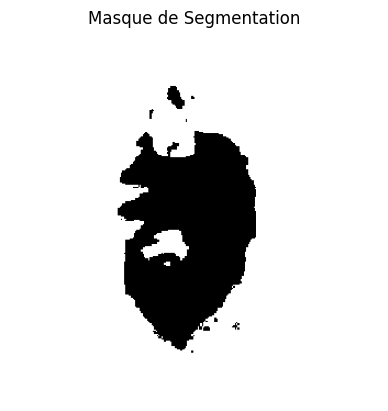

True

In [ ]:
y_new=clf.predict(X_new)
# Reconstruire le masque de segmentation en fonction de la forme d'origine de l'image
mask_new = y_new.reshape(image.shape[:2])  # Reshape pour correspondre aux dimensions hauteur x largeur

# Afficher le masque de segmentation
plt.imshow(mask_new, cmap='gray')
plt.title("Masque de Segmentation")
plt.axis('off')
plt.show()
# Spécifier le chemin pour sauvegarder l'image du masque
output_path = "/content/drive/MyDrive/tp3/Image_clustering/test_GT.bmp"

# Sauvegarder le masque de segmentation comme une image
# Multipliez par 255 pour obtenir des valeurs entre 0 et 255 pour une image en niveaux de gris
cv.imwrite(output_path, (mask_new * 255).astype('uint8'))

 L'image segmentée montre que le modèle a réussi à bien apprendre les caractéristiques visuelles, ce qui permet une séparation efficace des zones ciblées. Cela démontre que ce modèle est performant pour la tâche de segmentation basée sur ces caractéristiques colorimétriques.

### 2. Deuxième modèle

### 2.1 Extraction des caracteristiques

In [ ]:
# Segmentation par intensité de l’image en niveau de gris
import cv2 as cv
import numpy as np
# Charger l'image originale
image_path="/content/drive/MyDrive/tp3/Image_clustering/1.bmp"
image=cv.imread(image_path)
imageRBG=cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# descirpteur: Intensités dans l'espace GRAY
imgGRAY_reshape=imageRBG.reshape(-1,1)
# X représente la matrice de caractéristiques
X = np.concatenate([imgGRAY_reshape])
print(X.shape)

(113232, 1)


### 2.2 Création de l’étiquette

In [ ]:
import cv2 as cv
mask_path="/content/drive/MyDrive/tp3/Image_clustering/1_GT.bmp"
imageMask=cv.imread(mask_path, cv.IMREAD_GRAYSCALE)
h,w= np.array(imageMask.shape)
imageMask=imageMask.ravel()//255
imageMask = imageMask.reshape(-1,1)

# Construction des étiquettes y
y =np.concatenate(imageMask)

### 2.3 Modele SVM

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
from sklearn import svm
clf1 = svm.SVC()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)
print(clf1.score)
rapport=classification_report(y_test, y_pred)
# Afficher le rapport sous forme de tableau
print('Rapport de Classification : \n',rapport)
import sklearn.metrics as metrics
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro'))
print("recall : ", metrics.recall_score(y_test, y_pred, average='macro'))
print("f1 score: ", metrics.f1_score(y_test, y_pred, average='macro'))
# Sauvegarder le modèle
joblib.dump(clf1, "/content/drive/MyDrive/tp3/modele_svm_gray.pkl")

<bound method ClassifierMixin.score of SVC()>
Rapport de Classification : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     15345
           1       0.99      0.96      0.97     22022

    accuracy                           0.97     37367
   macro avg       0.97      0.97      0.97     37367
weighted avg       0.97      0.97      0.97     37367

accuracy:  0.9690368506971392
precision:  0.9658433192966196
recall :  0.9711918254440248
f1 score:  0.9682078516646029


['/content/drive/MyDrive/tp3/modele_svm_gray.pkl']

### 2.4 Segmenter l'image 2

In [ ]:
# Segmentation par intensité de l’image en niveau de gris
import cv2 as cv
import numpy as np
# Charger l'image originale
image_path="/content/drive/MyDrive/tp3/Image_clustering/2.bmp"
image=cv.imread(image_path)
imageRBG=cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# descirpteur: Intensités dans l'espace GRAY
imgGRAY_reshape=imageRBG.reshape(-1,1)
# X représente la matrice de caractéristiques
X = np.concatenate([imgGRAY_reshape])
print(X.shape)

(113232, 1)


In [ ]:
Ynew=clf1.predict(X)

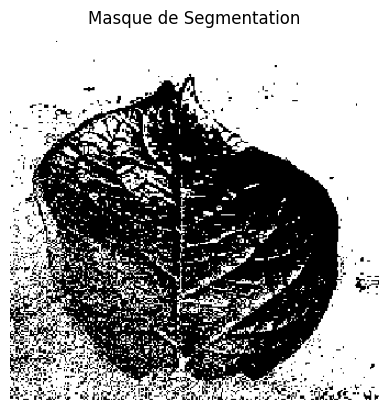

In [ ]:
# Reconstruire le masque de segmentation en fonction de la forme d'origine de l'image
mask_new = Ynew.reshape(image.shape[:2])
# Afficher le masque de segmentation
plt.imshow(mask_new, cmap='gray')
plt.title("Masque de Segmentation")
plt.axis('off')
plt.show()

### 2.5 Evaluer le modéle

In [ ]:
mask_path_2GT="/content/drive/MyDrive/tp3/Image_clustering/2_GT.bmp"
imageMask_2GT=cv.imread(mask_path_2GT, cv.IMREAD_GRAYSCALE).ravel()//255
imageMask_2GT = imageMask_2GT.reshape(-1,1)
y_2GT =np.concatenate(imageMask_2GT)

confusion_matrix(y_2GT, Ynew)
rapport=classification_report(y_2GT, Ynew)
# Afficher le rapport sous forme de tableau
print('Rapport de Classification : \n',rapport)
import sklearn.metrics as metrics
print("accuracy: ", metrics.accuracy_score(y_2GT, Ynew))
print("precision: ", metrics.precision_score(y_2GT, Ynew, average='macro'))
print("recall : ", metrics.recall_score(y_2GT, Ynew, average='macro'))
print("f1 score: ", metrics.f1_score(y_2GT, Ynew, average='macro'))

Rapport de Classification : 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84     52426
           1       0.85      0.88      0.87     60806

    accuracy                           0.85    113232
   macro avg       0.85      0.85      0.85    113232
weighted avg       0.85      0.85      0.85    113232

accuracy:  0.8533541754980924
precision:  0.8539410283869258
recall :  0.8508897844082033
f1 score:  0.8519823214427793


### 2.6 Test

In [ ]:
# Segmentation par intensité de l’image en niveau de gris
import cv2 as cv
import numpy as np
# Charger l'image originale
image_path="/content/drive/MyDrive/tp3/Image_clustering/test.bmp"
image=cv.imread(image_path)
imageRBG=cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# descirpteur: Intensités dans l'espace GRAY
imgGRAY_reshape=imageRBG.reshape(-1,1)
# X représente la matrice de caractéristiques
X = np.concatenate([imgGRAY_reshape])
print(X.shape)

(113232, 1)


### Application du Modèle SVM sur la Nouvelle Donnée

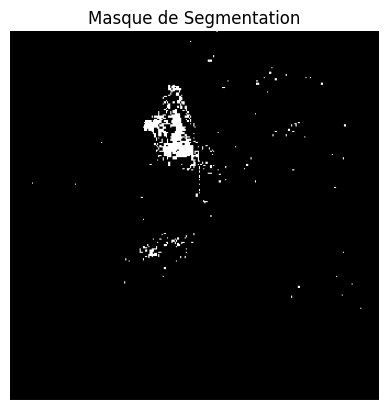

True

In [ ]:
y_new=clf1.predict(X)
# Reconstruire le masque de segmentation en fonction de la forme d'origine de l'image
mask_new = y_new.reshape(image.shape[:2])  # Reshape pour correspondre aux dimensions hauteur x largeur

# Afficher le masque de segmentation
plt.imshow(mask_new, cmap='gray')
plt.title("Masque de Segmentation")
plt.axis('off')
plt.show()
# Spécifier le chemin pour sauvegarder l'image du masque
output_path = "/content/drive/MyDrive/tp3/Image_clustering/test_GT_Gray.bmp"

# Sauvegarder le masque de segmentation comme une image
# Multipliez par 255 pour obtenir des valeurs entre 0 et 255 pour une image en niveaux de gris
cv.imwrite(output_path, (mask_new * 255).astype('uint8'))

L'image segmentée montre que le modèle n'a pas réussi à apprendre correctement les caractéristiques visuelles, ce qui entraîne une séparation inefficace des zones ciblées. Cela démontre que ce modèle est peu performant pour la tâche de segmentation basée sur les intensités en niveaux de gris.